In [ ]:
def otsu(img):
  frequency = np.array([0] * 256)

  for row in range(img.shape[0]):
    for col in range(img.shape[1]):
      frequency[img[row][col]]+=1

  frequency = frequency / (img.shape[0] * img.shape[1])

  mod_mapping = np.empty(256)
  total = 0
  for i in range(0, len(frequency)):
    mod_mapping[i] = frequency[i] + total
    total = mod_mapping[i]



  cum_mean = np.array([0] * 256)
  cum_mean[0] = 0
  for i in range(1, len(frequency)):
    cum_mean[i] = cum_mean[i - 1] + mod_mapping[i] * i

  global_mean = np.mean(img)

  mod_mapping = np.round(mod_mapping, 0)
  #mod_mapping = mod_mapping.astype('int32')

  bcv = np.zeros(256)
  max = 0
  for i in range(0, len(frequency)):
    bcv[i] = ((global_mean * mod_mapping[i] - cum_mean[i])**2) / (mod_mapping[i] * (1 - mod_mapping[i]))
    if (bcv[i] >= max):
      max = bcv[i]

  max_indices = []
  for i in range(0, len(bcv)):
    if(bcv[i] == max):
      max_indices.append(i)

  max_indices = np.array(max_indices)
  otsu_t = np.mean(max_indices)

  global_variance = np.var(img)
  otsu_t = round(otsu_t)

  sep_measure = bcv[otsu_t] / global_variance

  mod_img = np.zeros(img.shape)

  for row in range(img.shape[0]):
    for col in range(img.shape[1]):
      if(img[row][col] > otsu_t):
        mod_img[row][col] = 255
      else:
        mod_img[row][col] = 0

  return mod_img

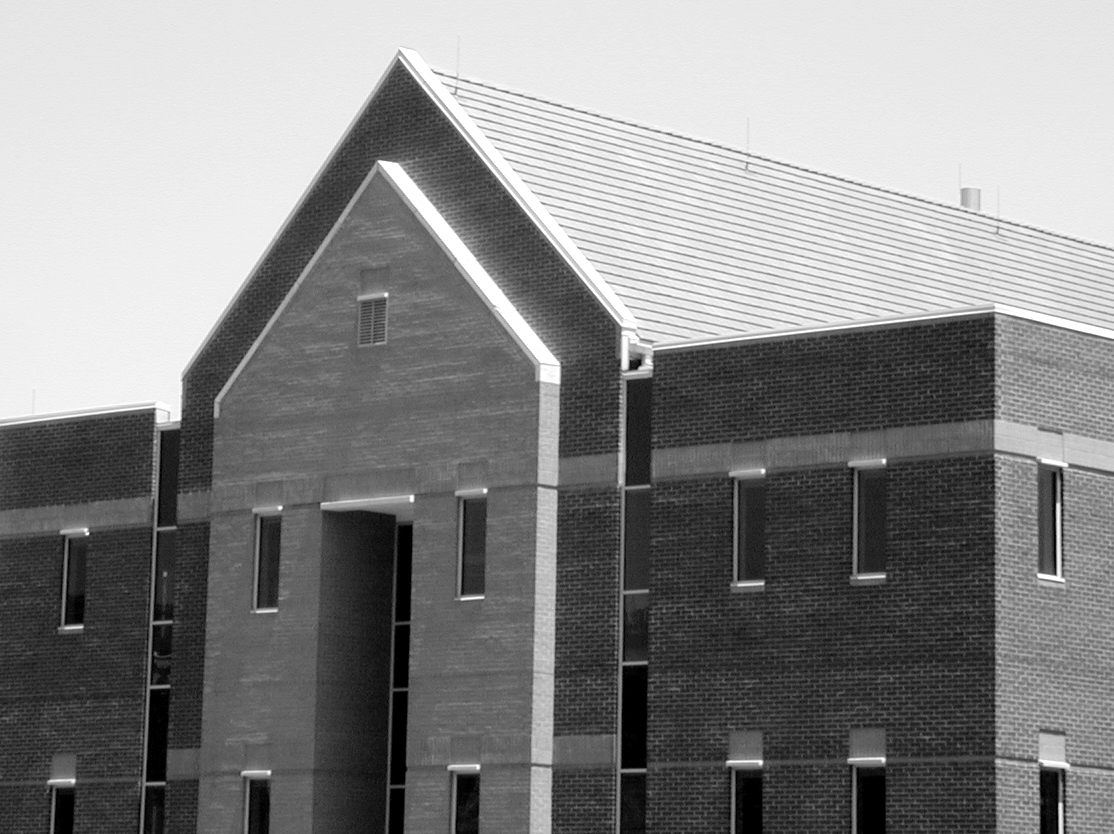

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:31: RuntimeWarning: invalid value encountered in double_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:31: RuntimeWarning: divide by zero encountered in double_scalars


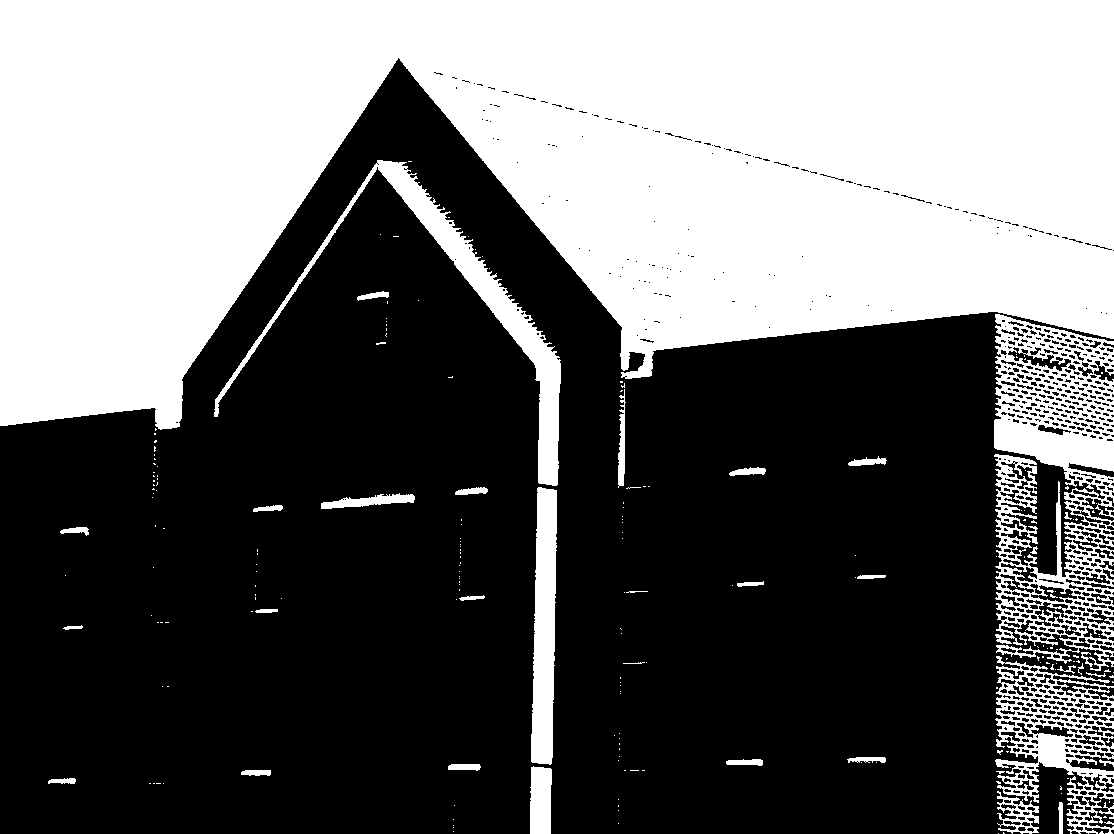

In [ ]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow
import math

from matplotlib import pyplot as plt

img = cv2.imread("house.tif", 0)
cv2_imshow(img)
print("\n")
cv2_imshow(otsu(img))